<a href="https://colab.research.google.com/github/Columbia-Neuropythonistas/PythonDataCourse2021/blob/main/Lecture5_SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import random
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import pickle


# Regression

## Linear Regression
In this section you'll learn how to use sklearn to fit models of the form:
$$ y = x \cdot \alpha +\beta +\epsilon $$, using sklearn's linear regression model.

In [ ]:
def mystery_fun(X):
    return 1.5*np.cos(2*np.pi*X**2 + np.random.randn())

In [ ]:
n_samples = 500
n_predictors = 1
X = (np.random.rand(n_samples,n_predictors))
Y = mystery_fun(X) + .15*np.random.randn(n_samples,n_predictors)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_predict = reg.predict(X_test)

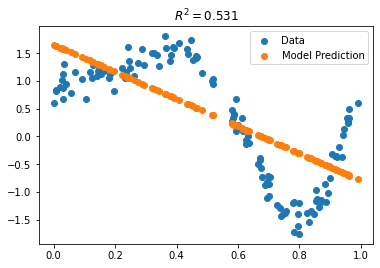

In [ ]:
plt.title(r'$R^2 = {:.3F}$'.format(reg.score(X_test,Y_test)))
plt.scatter(X_test[:,0],Y_test, label='Data')
plt.scatter(X_test[:,0],Y_predict, label='Model Prediction')
plt.legend()

## Polynomial Regression
In this section you'll learn how to fit a model of the form:
$$ y = \sum_{i=0}^N A_i\cdot x^i$$, i.e polynomial equations using ordinary least squares.

In [ ]:
polynomial_features = PolynomialFeatures(degree=3,include_bias = True)
linear_regression = LinearRegression()
pipeline = Pipeline([('Polynomial_features',polynomial_features),('linear_regression',linear_regression)])
pipeline.fit(X_train,Y_train)
Y_predictPoly = pipeline.predict(X_test)

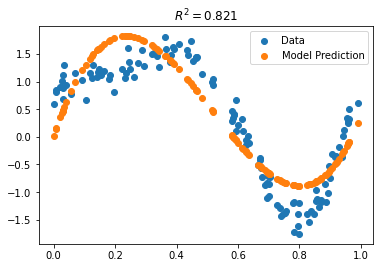

In [ ]:
plt.title(r'$R^2 = {:.3F}$'.format(pipeline.score(X_test,Y_test)))
plt.scatter(X_test[:,0],Y_test, label='Data')
plt.scatter(X_test[:,0],Y_predictPoly, label='Model Prediction')
plt.legend()

## Using grid search to compare models

In [ ]:
pipe = Pipeline([('polynomial_features', PolynomialFeatures()),('linear_regression', linear_model.Ridge())])
param_grid = {
    'polynomial_features__degree': np.arange(1,50,5),
    'linear_regression__alpha': [1e-6,1e-3,1,1e3,1e6]
}
grid = GridSearchCV(pipe, cv=10, n_jobs=5, param_grid=param_grid,
                    scoring='neg_mean_squared_error') #n_jobs tells python how many models you want to run at a time. If
# computer is pretty powerful it should be able to handle 5 models at a time with too much effort.
grid.fit(X_train,Y_train)
GridDict = grid.cv_results_
best_model = grid.best_estimator_
Y_predictBest = best_model.predict(X_test)
GridResults = pd.DataFrame(GridDict)

In [ ]:
print(grid.best_params_)
GridResults.head()

{'linear_regression__alpha': 1e-06, 'polynomial_features__degree': 31}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linear_regression__alpha,param_polynomial_features__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001620,0.000260,0.000557,0.000168,0.000001,1,"{'linear_regression__alpha': 1e-06, 'polynomia...",-0.468686,-0.579858,-0.564125,-0.645746,-0.461784,-0.440106,-0.544151,-0.584229,-0.661427,-0.410515,-0.536062,0.082380,29
1,0.001348,0.000244,0.000501,0.000047,0.000001,6,"{'linear_regression__alpha': 1e-06, 'polynomia...",-0.029023,-0.029717,-0.022321,-0.023282,-0.020319,-0.029174,-0.021127,-0.026168,-0.040161,-0.027490,-0.026878,0.005523,17
2,0.001173,0.000125,0.000449,0.000026,0.000001,11,"{'linear_regression__alpha': 1e-06, 'polynomia...",-0.025725,-0.017999,-0.018300,-0.020671,-0.015303,-0.022445,-0.021090,-0.025846,-0.030928,-0.024278,-0.022259,0.004362,7
3,0.001053,0.000072,0.000471,0.000063,0.000001,16,"{'linear_regression__alpha': 1e-06, 'polynomia...",-0.025646,-0.018214,-0.018140,-0.020466,-0.015450,-0.022306,-0.020776,-0.026060,-0.030884,-0.024439,-0.022238,0.004361,5
4,0.001080,0.000098,0.000474,0.000067,0.000001,21,"{'linear_regression__alpha': 1e-06, 'polynomia...",-0.025455,-0.018232,-0.018051,-0.020440,-0.015287,-0.022571,-0.020480,-0.026317,-0.030872,-0.024507,-0.022221,0.004416,4


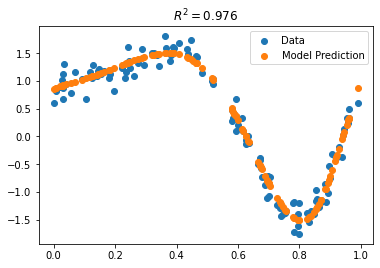

In [ ]:
plt.title(r'$R^2 = {:.3F}$'.format(best_model.score(X_test,Y_test)))
plt.scatter(X_test[:,0],Y_test, label='Data')
plt.scatter(X_test[:,0],Y_predictBest, label='Model Prediction')
plt.legend()

## Neural Network regression

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
network = MLPRegressor(max_iter = 1500)
network.fit(X_train, np.ravel(Y_train))
Y_predictNet = network.predict(X_test)

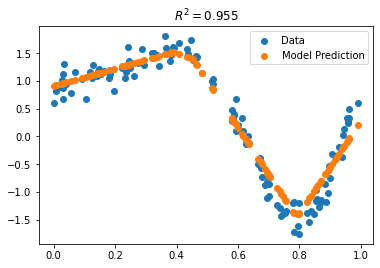

In [ ]:
plt.title(r'$R^2 = {:.3F}$'.format(network.score(X_test,Y_test)))
plt.scatter(X_test[:,0],Y_test, label='Data')
plt.scatter(X_test[:,0],Y_predictNet, label='Model Prediction')
plt.legend()

## Excercise 1:
Using any of the previous methods (linear regression, polynomial regression, or multilayer perceptron) fit a model to the responses of three simulated neurons to images at varying wavelengths and contrast. Try to achieve an $R^2$ of at least $0.8$.
For each cell type plot the predicted response vs the actual response.

In [ ]:
from urllib.request import urlopen
import cloudpickle as cp
Data = cp.load(urlopen("https://raw.githubusercontent.com/Columbia-Neuropythonistas/PythonDataCourse2021/master/Lecture5/VisualData/visualneurons.p"))
Xs = (Data['Inputs'].T) #The first column of Xs is the wavelength of the stimulus and the second column is the intensity
Y1 = Data['Population 1'][0] #responses for neuron 1
Y2 = Data['Population 2'][0]
Y3 = Data['Population 3'][0]
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(Xs,Y1)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(Xs,Y2)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(Xs,Y3)

In [ ]:
XL = [X_train1, X_train2, X_train3]
YL = [Y_train1, Y_train2, Y_train3]

fig, ax = plt.subplots(1,len(YL),figsize=(len(YL)*5,5),sharex=True, sharey=True)

for i , ax in enumerate(ax):
    ax.scatter(XL[i][:,0], XL[i][:,1],c=YL[i])
    ax.set_title('Cell type {}'.format(i +1))
fig.text(0.5, 0.04, r'$\lambda$ (nm)', ha='center')
fig.text(0.04, 0.5, 'Intensity', va='center', rotation='vertical')
plt.show()

## Excercise 2:
Create a raster plot of the neural responses across time. Using either a MLP, linear regression, or polynomial regression use the responses of a simulated population of neurons to decode the wavelength and contrast of the input image.
Aim for an $R^2 \geq 0.9$.

In [ ]:
Y = Data['Inputs'].T #responses from 500 neurons
X = Data['Population 2'].T

# Classification:

In [ ]:
from sklearn.datasets import make_classification, make_blobs, make_moons, make_circles
n_samples = 1000
X , Y = make_classification(n_samples = n_samples, n_features = 50, n_informative = 5, n_clusters_per_class = 4) #creating a toy dataset with two classes
X_train , X_test, Y_train, Y_test = train_test_split(X,Y)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(max_depth = 5)
forest.fit(X_train,Y_train)

In [ ]:
forest.score(X_test,Y_test)
rf_prediction = forest.predict(X_test)

In [ ]:
plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(Y_test, rf_prediction), annot=True, fmt = "d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

rf_predicted_probs = forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, rf_predicted_probs)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("Area_under the curve :", metrics.auc(fpr, tpr)), color = "r")
plt.plot([1,0], [1,0], linestyle = "dashed", color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

# K nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors = 5)
neighbors.fit(X_train, Y_train)
nh_prediction = neighbors.predict(X_test)

In [ ]:
plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(Y_test, nh_prediction), annot=True, fmt = "d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

nh_predicted_probs = neighbors.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, nh_predicted_probs)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("Area_under the curve :", metrics.auc(fpr, tpr)), color = "r")
plt.plot([1,0], [1,0], linestyle = "dashed", color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

# Support Vectors

In [ ]:
from sklearn import neighbors, svm

In [ ]:
svc = svm.SVC(kernel='poly',probability=True)
svc.fit(X_train, Y_train)
sv_prediction = svc.predict(X_test)

In [ ]:
plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(Y_test, sv_prediction), annot=True, fmt = "d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

sv_predicted_probs = svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, sv_predicted_probs)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("Area_under the curve :", metrics.auc(fpr, tpr)), color = "r")
plt.plot([1,0], [1,0], linestyle = "dashed", color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(Y_test, sv_prediction), annot=True, fmt = "d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

sv_predicted_probs = svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, sv_predicted_probs)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("Area_under the curve :", metrics.auc(fpr, tpr)), color = "r")
plt.plot([1,0], [1,0], linestyle = "dashed", color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naiveGauss = GaussianNB()
naiveGauss.fit(X_train,Y_train)
nb_prediction = naiveGauss.predict(X_test)

In [ ]:
plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(Y_test, nb_prediction), annot=True, fmt = "d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

nb_predicted_probs = naiveGauss.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, nb_predicted_probs)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("Area_under the curve :", metrics.auc(fpr, tpr)), color = "r")
plt.plot([1,0], [1,0], linestyle = "dashed", color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
network = MLPClassifier(hidden_layer_sizes = (100,), max_iter = 500)
network.fit(X_train, Y_train)
nt_prediction = network.predict(X_test)

In [ ]:
plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(Y_test, nt_prediction), annot=True, fmt = "d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

nt_predicted_probs = network.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, nt_predicted_probs)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("Area_under the curve :", metrics.auc(fpr, tpr)), color = "r")
plt.plot([1,0], [1,0], linestyle = "dashed", color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

## Comparing Models in sklearn

In [ ]:
h = .02  # step size in the mesh

names = ["Random Forest","Nearest Neighbors", "Linear SVM", "Polynomial SVM", "RBF SVM", "Gaussian Naive Bayes",
          "RELU Neural Network","Tanh Neural Network"]

classifiers = [RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    KNeighborsClassifier(5),
    svm.SVC(kernel="linear", C=0.025),
    svm.SVC(kernel='poly'),
    svm.SVC(gamma=2, C=1),
    GaussianNB(),
    MLPClassifier(alpha=1, max_iter=1000,hidden_layer_sizes = (100,50)),
    MLPClassifier(activation='tanh',alpha=1, max_iter=1000,hidden_layer_sizes = (100,50)),
              ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

In [ ]:
from matplotlib.colors import ListedColormap
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# Project 1:
In this project we'll be using gene expression data from gollub et al (1999) to build a model that classifies two type of cancerous tumors acute myeloid leukemia (AML: 1) and acute lymphoblastic leukemia (ALL: 0). This dataset consits of the epression of 7129 genes collected from 72 cancerous patients.

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Columbia-Neuropythonistas/PythonDataCourse2021/master/Lecture5/CancerData/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Columbia-Neuropythonistas/PythonDataCourse2021/master/Lecture5/CancerData/test.csv')
train.head() 

## Preprocessing:

### Using either seaborn or matplotlib create a barplot of the number of AML and ALL patients in the trainning and test set.

You should notice that the number of patients with ALL out numbers the number of patients with AML in the training set. This is generally bad for model fitting, so we'll need to upsample the number of AML patients in the trainning group to get a good model. You don't need to worry about understanding the code in the cell below, all it does is add 7 random patients with AML cancer.

In [ ]:
upsample = random.sample(train.query('cancer == 1')['patient'].index.tolist(),k=7,)
upsampled_train = pd.concat([train, train.iloc[upsample,:]])

sklearn expects numpy arrays, so the cell below just converts your pandas DataFrame in to np.ndarrays.

In [ ]:
Xtrain = upsampled_train[:-2].values
Ytrain = train['cancer'].values
Xtest = test[:-2].values
Ytest = test['cancer'].values

### Print the standard deviation and mean of each gene's expression.
There are many ways to do this but try doing it without using a for loop.

You should also notice that the gene expressions have wildly different standard deviations and means. Models generally do better when all of their data have a variance of 1 and a mean of 0. Using the StandardScaler method, normalize the features by their standard deviation and mean. 

## Modeling:

### Now that the data has been nicely preprocessed, use any of the classification methods above to fit a model a to the trainning data, and use the test set to check the accuracy of your model. 